In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


In [90]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

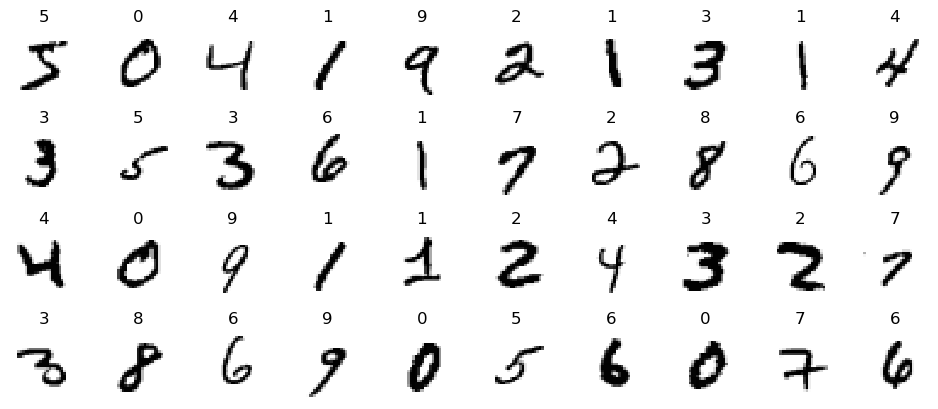

In [91]:


class_names = np.unique(y_train_full)

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



In [92]:
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [93]:
X_train_full.shape

(60000, 28, 28)

Dividimos el X_train e y_train en dos (X_Valid y X_train) el cual se tiene que dividir entre 255 para escalar los valores

In [94]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0  # Split into train and validation sets
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]  # Split labels accordingly

X_test = X_test / 255.0  # Normalize test data

# Reshape the data to add the channel dimension (since you're using Conv2D)
X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [95]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

#Compilar el modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [96]:
#!pip install pydot_ng==2.0.0
#!pip install pydot==1.4.2
#!conda install -y graphviz

In [97]:
keras.utils.plot_model(model, "model.png", show_shapes=True,show_dtype=True,show_layer_names=True,)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [98]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [99]:
X_train.shape

(55000, 28, 28, 1)

In [100]:

import sys


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6118 - accuracy: 0.7984 - val_loss: 0.0981 - val_accuracy: 0.9696
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1409 - accuracy: 0.9556 - val_loss: 0.0663 - val_accuracy: 0.9822
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1062 - accuracy: 0.9668 - val_loss: 0.0654 - val_accuracy: 0.9830
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9741 - val_loss: 0.0496 - val_accuracy: 0.9874
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.0492 - val_accuracy: 0.9862
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0610 - accuracy: 0.9813 - val_loss: 0.0505 - val_accuracy: 0.9864
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0483 - val_accuracy:

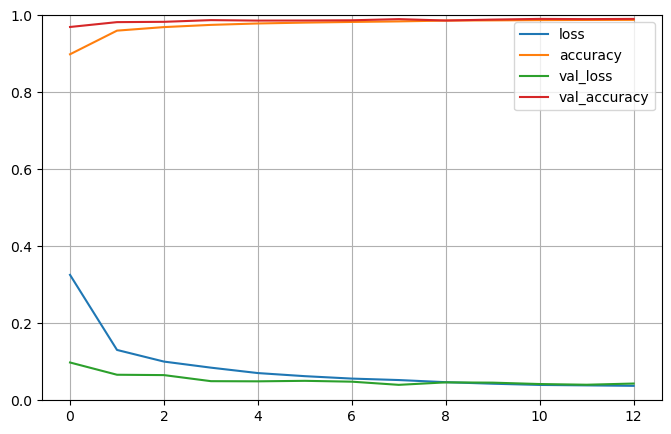

In [101]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
#1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9156 - loss: 0.2316 - val_accuracy: 0.8872 - val_loss: 0.3271

In [102]:
mse_test = model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 906us/step - loss: 0.0392 - accuracy: 0.9888


In [103]:
X_nuevas = X_test
y_pred = model.predict(X_nuevas)
y_pred

array([[4.1021684e-09, 1.1164627e-05, 5.7918055e-06, ..., 9.9997938e-01,
        5.3415061e-10, 2.1694989e-06],
       [3.6400930e-08, 1.0453582e-07, 9.9997532e-01, ..., 2.4250967e-05,
        2.4626390e-08, 2.0855723e-10],
       [2.6586125e-07, 9.9994075e-01, 9.1937918e-06, ..., 1.2077142e-05,
        3.9498736e-06, 4.3467904e-07],
       ...,
       [2.6886606e-11, 1.4343003e-10, 3.7941511e-11, ..., 3.4035375e-09,
        2.8771121e-06, 2.8150521e-07],
       [1.6007027e-07, 1.7710373e-09, 8.9844293e-10, ..., 1.4408219e-08,
        4.6463778e-05, 7.9493566e-06],
       [1.8782337e-05, 3.1195828e-08, 8.5125766e-06, ..., 2.5954386e-10,
        1.1257398e-05, 6.8191916e-08]], dtype=float32)

In [104]:
# Probabilidad de que sea uno de los 10 Clas Names
y_pred.round(2)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
y_pred = np.argmax(y_pred, axis=1)
np.array(class_names)[y_pred]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [106]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [107]:
x=0
for index,i in enumerate(y_test):
    if i != y_pred[index]:
        x+=1
print("DIFERENTES %i:%i"%(x,len(y_test)))

DIFERENTES 112:10000


In [108]:
model.save('numeros.h5')

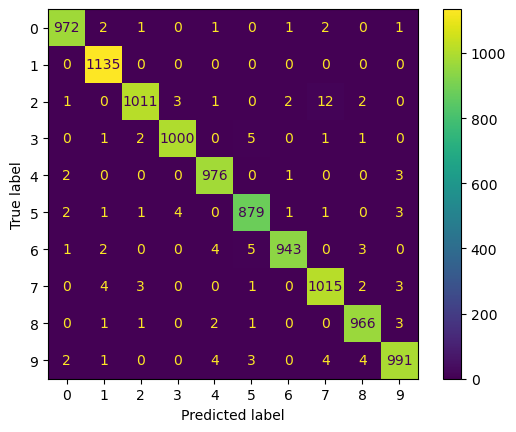

In [110]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [111]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.8/686.8 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 4.6 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 6.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB

In [114]:
import tensorflowjs as tfjs

ImportError: cannot import name 'KerasLazyLoader' from 'tensorflow.python.util.lazy_loader' (/home/diegogl/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/util/lazy_loader.py)

In [116]:
!tensorflowjs_converter --input_format keras numeros.h5 modelo

2024-04-28 18:13:48.974029: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 18:13:49.433976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
